In [1]:
ClockBin = 1.5625
LHCOrbitTimeInClockBins = 56909.083734635
LHCOrbitTime = LHCOrbitTimeInClockBins*ClockBin
delta = 15.96779293
BunchFrequency = (1/(ClockBin*1e-9))*1e-6/delta

In [2]:
Classes = ["Dot", "Small Blobs", "Heavy Blobs", "Heavy Tracks", "Straight Tracks", "Curly Tracks"]
colors=['k','r','y','c','b','g']

In [3]:
%run ../../ClusterFunc.py
%run ../../PlottingFunc.py
%run ./OfflineTriggerFunc.py

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib import cm

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from scipy.signal import find_peaks
from scipy.optimize import minimize, minimize_scalar
import pyunfold

In [6]:
df= pd.read_csv("c:/shared/LandauData/MoEDAL/ProtonCollision/Clustered - 29_September_2018_04_29_e5_cleaned.txt - 09-08 06-11-2023_zsearch.txt",
                sep = " ", names = ["Class","MinToA","Height","Energy", "Size", "PredTheta","PredPhi", "x","y","t", "tt"], on_bad_lines="skip", nrows=50000000)[["Class","MinToA","Height","Energy", "Size", "PredTheta","PredPhi"]]
df = df.apply(pd.to_numeric, errors='coerce').dropna()
df["OGMinToA"]= df["MinToA"].copy()
df = df[df["Energy"]<(df["Size"]*17+500)]
#df["MinToA"] -= m

In [7]:
MaxTimeInClockBins = 1799999900288.149658%ClockBin

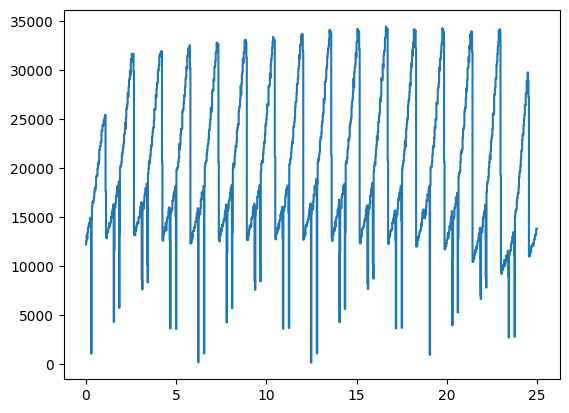

In [8]:
df = RemoveNoisyToAValues(df)

df["ToABin"] = np.digitize(df["MinToA"]%25, bins=np.linspace(0,25,1000+1))*25/1000
t = df.groupby("ToABin").size()
fig = plt.figure()
plt.step(t.index, t.values)
fig.canvas.draw()

In [9]:
df["MinToA"] = (df["MinToA"].values)//(ClockBin) #+ ClockBin*np.random.rand(len(df))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


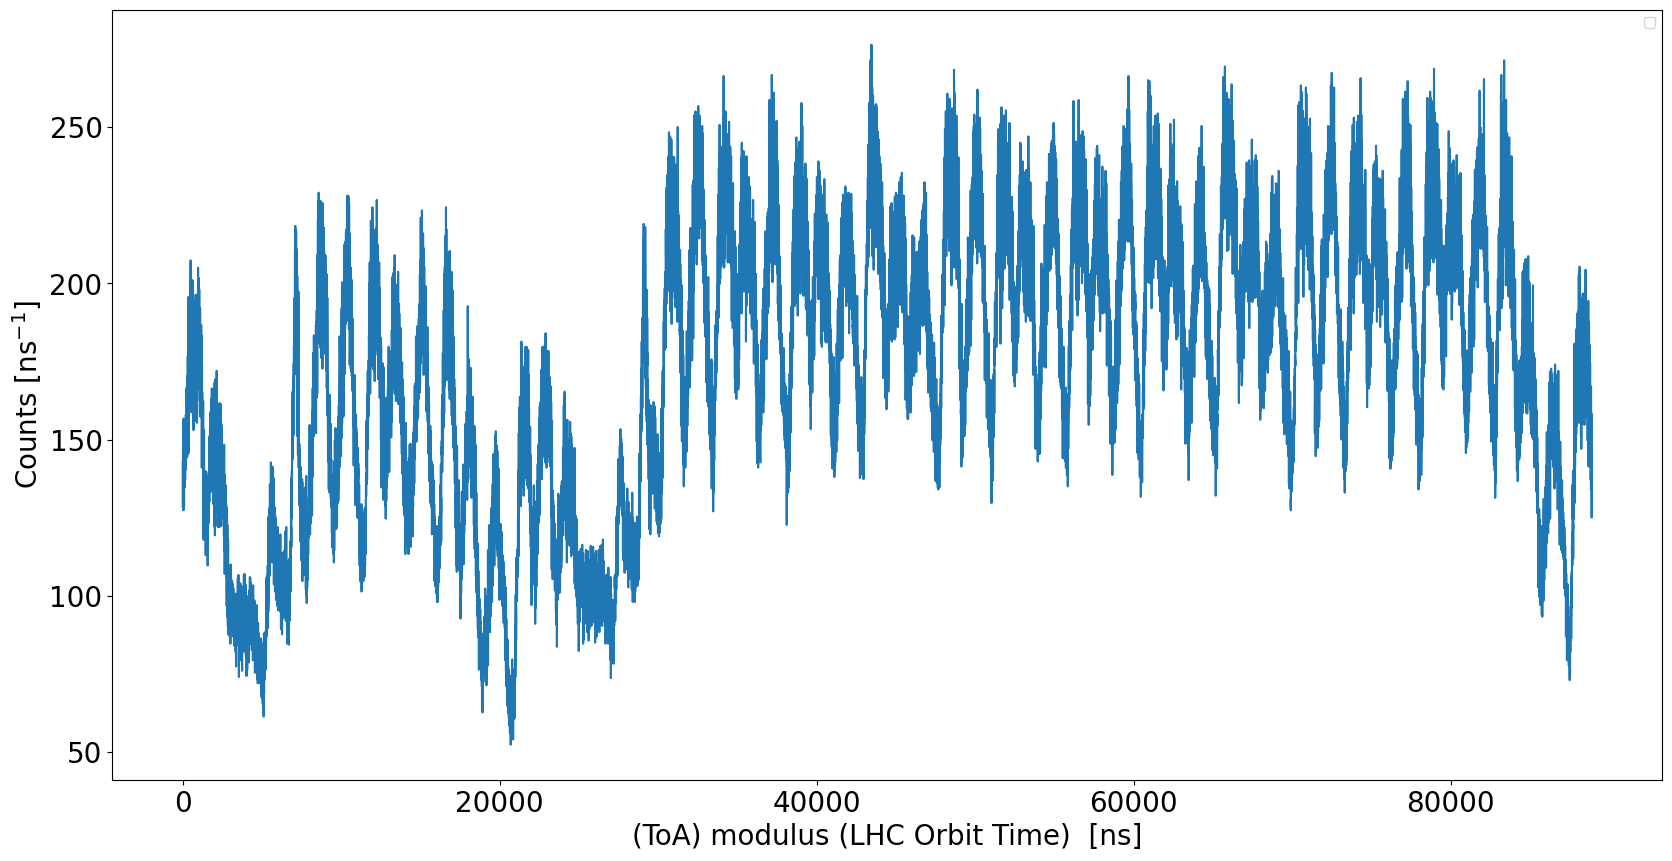

In [10]:
fig,ax =plt.subplots(figsize=(20,10))
y,x = np.histogram((df[df["Class"]==4]["MinToA"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,3))
ax.step(x[1:]*ClockBin, y/(x[1]-x[0]))
#ax.set_title("LHC Orbit Time = %.4f ns" %((56909.083 +j*3 + i -2 )*ClockBin),size=20)
ax.set_xlabel("(ToA) modulus (LHC Orbit Time)  [ns]", size=20)
ax.set_ylabel(r'Counts [ns$^{-1}$]', size=20)
ax.tick_params(labelsize=20)
#ax.set_xlim(42000,55000)
ax.legend()

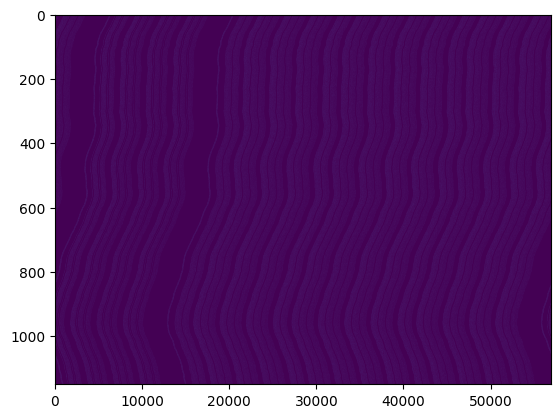

In [11]:
OrbitBins = np.arange(0,LHCOrbitTimeInClockBins,1)
TimeBins = np.arange(0,df["MinToA"].max(), 1e9)

Values = GetBunchStructureEvolutionMatrix(df[df["Class"]==4]["MinToA"], LHCOrbitTimeInClockBins, OrbitBins, TimeBins)
plt.figure()
plt.imshow(Values,aspect='auto')
plt.show()

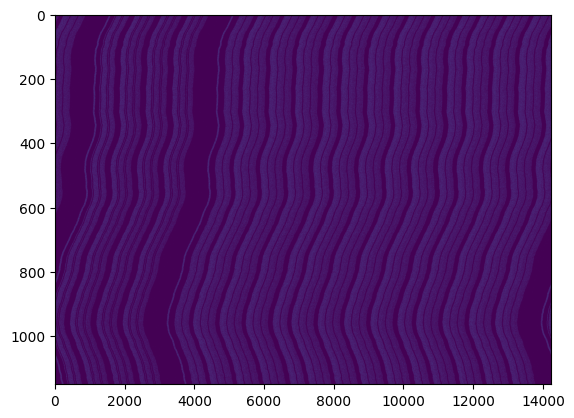

In [13]:
OrbitBins = np.arange(0,LHCOrbitTimeInClockBins,4)
TimeBins = np.arange(0,df["MinToA"].max(), 1e9)

Values = GetBunchStructureEvolutionMatrix(df[df["Class"]==4]["MinToA"], LHCOrbitTimeInClockBins, OrbitBins, TimeBins)
plt.figure()
plt.imshow(Values,aspect='auto')
plt.show()

In [260]:
#Shift = 2.5e9
%run ./OfflineTriggerFunc.py
OrbitBins = np.arange(0,LHCOrbitTimeInClockBins,10)
TimeBins = np.arange(0,df["MinToA"].max(), 10e9)
ShiftVector = FindClockDriftShiftCorrection(df["MinToA"], LHCOrbitTimeInClockBins, OrbitBins, TimeBins, MaxIterations=5,MaximumShift=15, method="Correlation")
df["DriftCorrectedToA"] = ApplyToAShiftCorrection(df["MinToA"], ShiftVector,TimeBins, (OrbitBins[1]-OrbitBins[0]))

OrbitBins = np.arange(0,LHCOrbitTimeInClockBins,5)
TimeBins = np.arange(0,df["MinToA"].max(), 10e9)
ShiftVector1 = FindClockDriftShiftCorrection(df["DriftCorrectedToA"], LHCOrbitTimeInClockBins, OrbitBins, TimeBins, MaxIterations=5,MaximumShift=15, method="Correlation")
df["DriftCorrectedToA1"] = ApplyToAShiftCorrection(df["DriftCorrectedToA"], ShiftVector1,TimeBins, (OrbitBins[1]-OrbitBins[0]))

OrbitBins = np.arange(0,LHCOrbitTimeInClockBins,1)
TimeBins = np.arange(0,df["MinToA"].max(), 10e9)
ShiftVector2 = FindClockDriftShiftCorrection(df["DriftCorrectedToA1"], LHCOrbitTimeInClockBins, OrbitBins, TimeBins, MaxIterations=5,MaximumShift=15, method="Correlation")
df["DriftCorrectedToA2"] = ApplyToAShiftCorrection(df["DriftCorrectedToA1"], ShiftVector1,TimeBins, (OrbitBins[1]-OrbitBins[0]))

0 1053.0 0.7092124140788023 613
1 152.0 0.8779783635182099 869
2 103.0 0.8836243837784838 930
3 93.0 0.8903251111516219 923
4 77.0 0.8929298601718068 971
0 159.0 0.8028463080332418 1997
1 145.0 0.8015345549959593 2040
2 141.0 0.7983535671395441 2041
3 134.0 0.8077078894799813 2001
4 123.0 0.8096695728222079 1994
0 733.0 0.5382981655014194 9731
1 661.0 0.5436427011250337 10010
2 624.0 0.5432246315373338 9878
3 534.0 0.5423103771769741 9439
4 540.0 0.5417019745872956 9912


In [173]:
%run ./OfflineTriggerFunc.py
TimeBins = np.arange(0,df["MinToA"].max(), 10e9)
OrbitBinWidths =      [10,4]#[10,9,8,7,6,5]
NumberOfIteractions = [3, 5]#[3,1,1,1,1,1]
for i in range(len(OrbitBinWidths)):
    OrbitBins = np.arange(0,LHCOrbitTimeInClockBins,OrbitBinWidths[i])
    if(i>0):
        Previous = "DriftCorrectedToA" + str(i-1)
    else:
        Previous = "MinToA"
    ShiftVector = FindClockDriftShiftCorrection(df[Previous], LHCOrbitTimeInClockBins, OrbitBins, TimeBins, MaxIterations=NumberOfIteractions[i],MaximumShift=15)
    df["DriftCorrectedToA" + str(i)] = ApplyToAShiftCorrection(df[Previous], ShiftVector,TimeBins, (OrbitBins[1]-OrbitBins[0]))

0 1052.0 0.7092124140788023 613
1 170.0 0.8781409859261861 863
2 115.0 0.8889294006715318 871
0 281.0 0.7608765878291264 2318
1 242.0 0.7649802459066246 2358
2 222.0 0.7764360690668093 2392
3 226.0 0.7752503692763085 2055
4 202.0 0.7837042055088407 2252


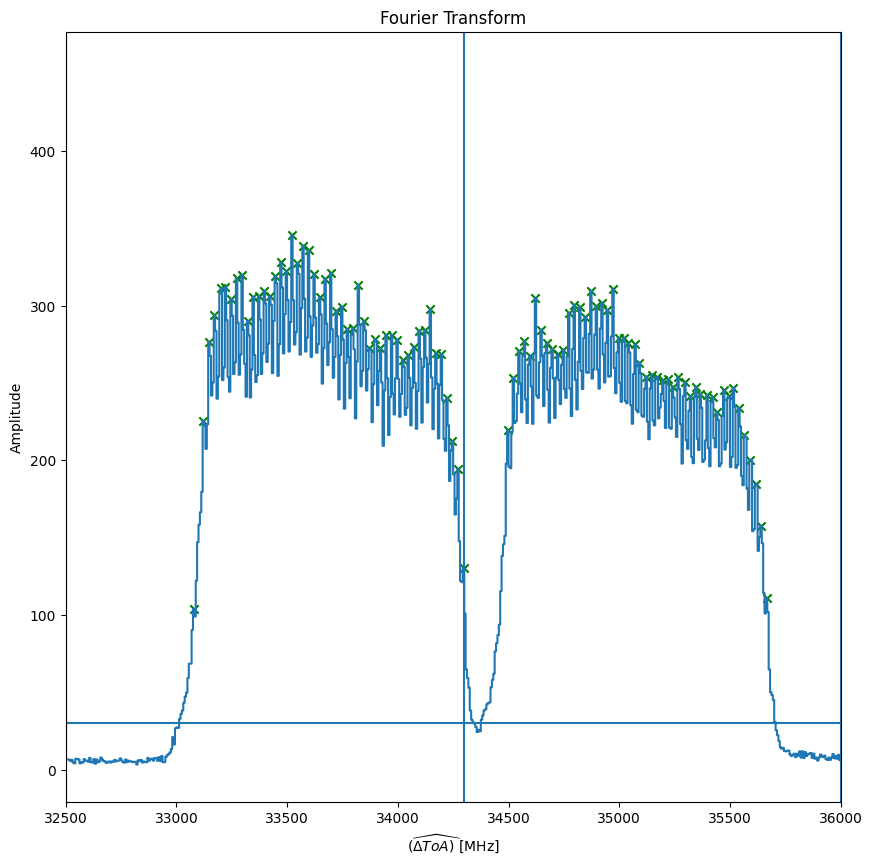

In [174]:

#,distance=delta/7)
plt.figure(figsize=(10,10))
#OrbitBins = np.arange(0,LHCOrbitTimeInClockBins,10)
#TimeBins = np.arange(0,df["MinToA"].max(), 10e9)
#df["DriftCorrectedToA"] = ApplyToAShiftCorrection(df["MinToA"], ShiftVector[:1],TimeBins, (OrbitBins[1]-OrbitBins[0]))
#y,x = np.histogram((df[df["Class"]==4]["DriftCorrectedToA"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,4))
#plt.step(x[1:]*ClockBin, y/(x[1]-x[0]))

#
#y,x = np.histogram((df[df["Class"]==4]["DriftCorrectedToA3"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,4))
#plt.step(x[1:]*ClockBin, y/(x[1]-x[0]))

#y,x = np.histogram((df[df["Class"]==4]["DriftCorrectedToA3"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,4))
#plt.step(x[1:]*ClockBin, y/(x[1]-x[0]))
#
#y,x = np.histogram((df[df["Class"]==4]["DriftCorrectedToA4"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,4))
#plt.step(x[1:]*ClockBin, y/(x[1]-x[0]))

#y,x = np.histogram((df[df["Class"]==4]["DriftCorrectedToA0"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,4))
#plt.step(x[1:]*ClockBin, y/(x[1]-x[0]))


df["DriftCorrectedToA1"] = ApplyToAShiftCorrection(df["DriftCorrectedToA0"], ShiftVector[:3],TimeBins, (OrbitBins[1]-OrbitBins[0]))
y,x = np.histogram((df[df["Class"]==4]["DriftCorrectedToA1"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,4))
plt.step(x[1:]*ClockBin, y/(x[1]-x[0]))

#df["DriftCorrectedToA1"] = ApplyToAShiftCorrection(df["DriftCorrectedToA0"], ShiftVector,TimeBins, (OrbitBins[1]-OrbitBins[0]))
#y,x = np.histogram((df[df["Class"]==4]["DriftCorrectedToA1"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,4))
#plt.step(x[1:]*ClockBin, y/(x[1]-x[0]))

peaks, _ = find_peaks(y/(x[1]-x[0]), height=30)
plt.scatter(((x[1:]+x[:-1])/2)[peaks]*ClockBin, y[peaks]/(x[1]-x[0]),marker='x',color='g')

plt.xlabel(r'$\widehat{ (\Delta ToA)}$ [MHz]')
plt.ylabel('Amplitude')
plt.title('Fourier Transform')
plt.xlim(32500,36000)
plt.axhline(30)
plt.axvline(32500)
plt.axvline(34300)
plt.axvline(36000)
plt.show()

In [175]:
peaks.shape[0] - 53*48

-5

In [176]:
peaks, _ = find_peaks(y[(x[1:]>(32500/ClockBin)) & (x[1:]<(34410/ClockBin))]/(x[1]-x[0]),height=30)#distance=delta/8)#
peaks.shape[0] #- 53*48

49

In [177]:
peaks, _ = find_peaks(y[(x[1:]>(34410/ClockBin)) & (x[1:]<(36000/ClockBin))]/(x[1]-x[0]),height=30)#distance=delta/8)#
peaks.shape[0] #- 53*48

48

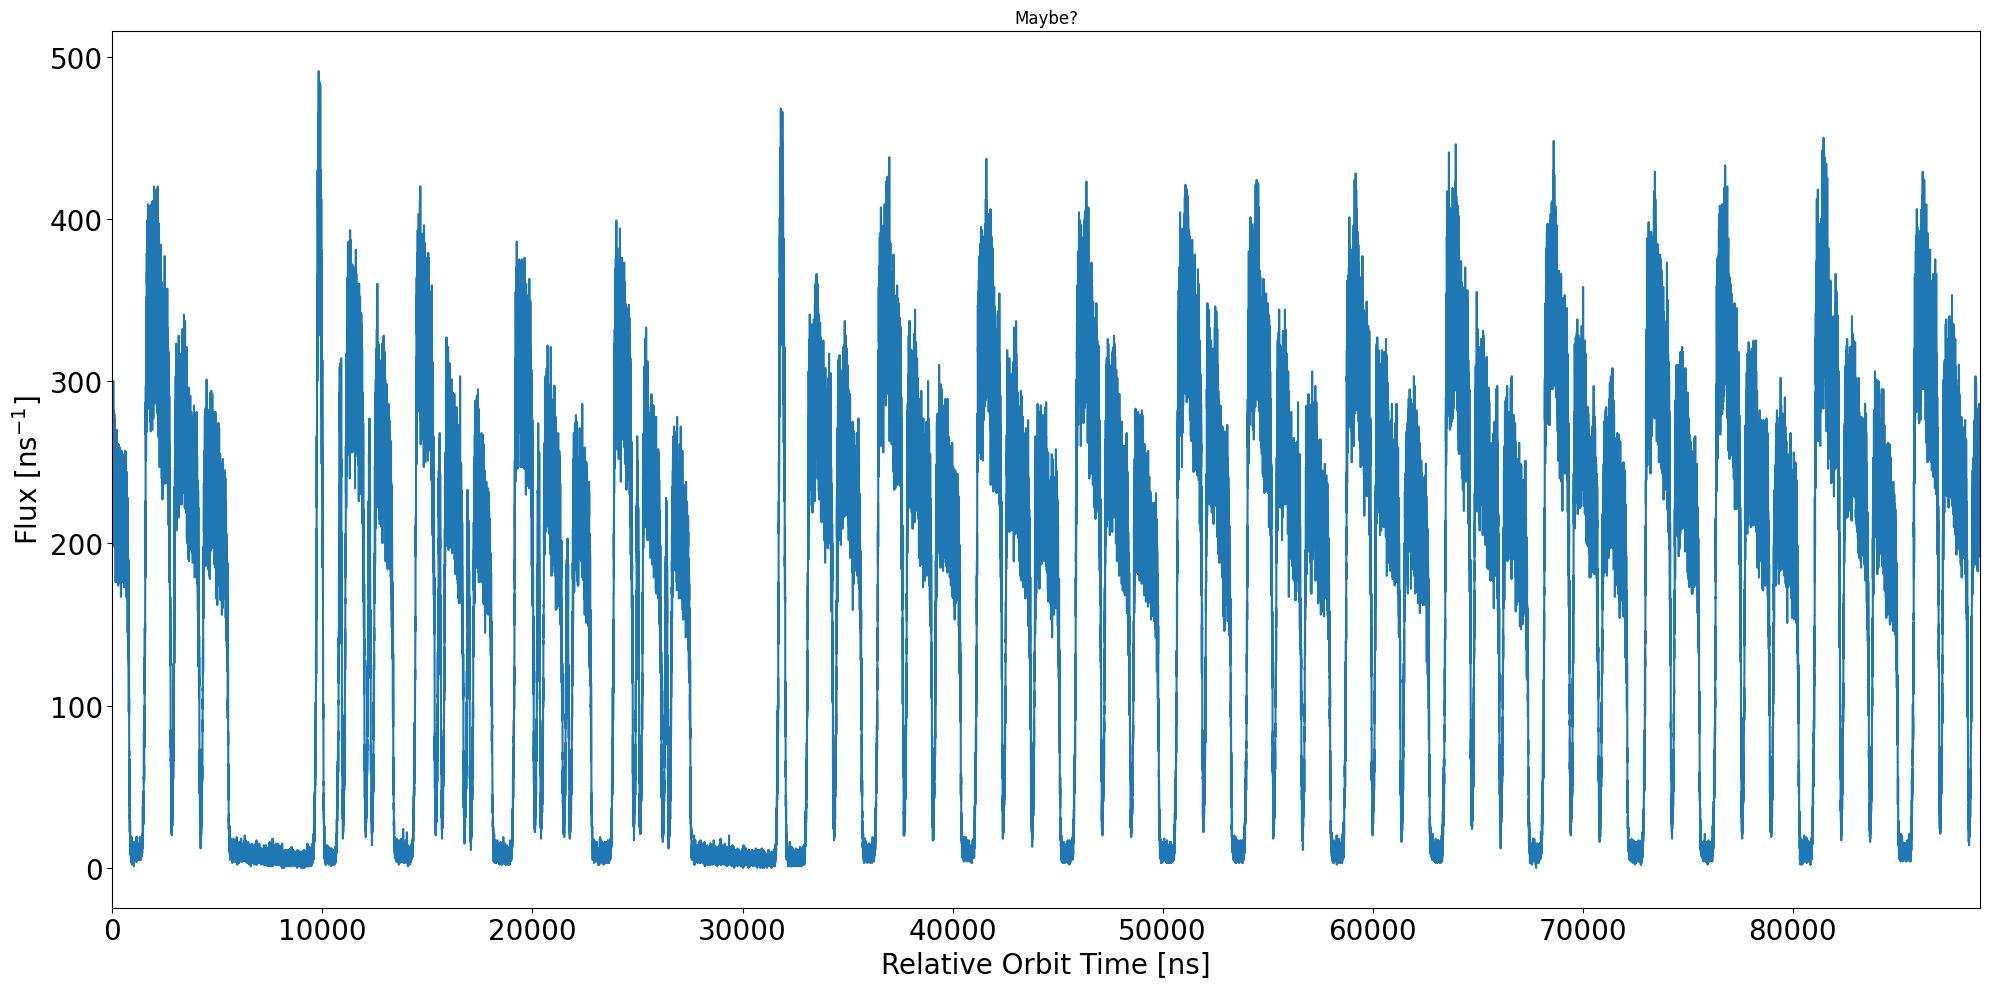

In [178]:
i = 12
fig,ax =plt.subplots(figsize=(20,10))
%run ./OfflineTriggerFunc.py
plt.title("Maybe?")
#df["DriftCorrectedToA"] = ApplyToAShiftCorrection(df["MinToA"], ShiftVector[:i],TimeBins, (OrbitBins[1]-OrbitBins[0]))
y,x = np.histogram((df[df["Class"]==4]["DriftCorrectedToA1"])%(LHCOrbitTimeInClockBins),bins=np.arange(0,LHCOrbitTimeInClockBins,1))
ax.step(x[1:]*ClockBin , y/(x[1]-x[0]))
#ax.set_title("LHC Orbit Time = %.4f ns" %((56909.083 +j*3 + i -2 )*ClockBin),size=20)
ax.set_xlabel("Relative Orbit Time [ns]", size=20)
ax.set_ylabel(r'Flux [ns$^{-1}$]', size=20)
ax.tick_params(labelsize=20)
ax.set_xlim(0,LHCOrbitTime)
#ax.set_xlim(33000,35000)
fig.tight_layout()